In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,id,dom_pv,ks_kpt,md_bct,md_ct,md_cvt,user_status
0,60,6,8,17,44,7,0
1,42,6,0,19,41,5,0
2,28,3,0,3,16,3,1
3,8,2,0,3,13,0,1
4,40,5,32,8,40,13,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           76 non-null     int64
 1   dom_pv       76 non-null     int64
 2   ks_kpt       76 non-null     int64
 3   md_bct       76 non-null     int64
 4   md_ct        76 non-null     int64
 5   md_cvt       76 non-null     int64
 6   user_status  76 non-null     int64
dtypes: int64(7)
memory usage: 4.3 KB


In [4]:
dataset.describe()

,id,dom_pv,ks_kpt,md_bct,md_ct,md_cvt,user_status
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,3.644737,10.973684,8.210526,25.960526,3.381579,0.500000
std,22.083176,1.984634,10.708220,5.107683,12.649575,2.847067,0.503322
min,1.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000
25%,19.750000,2.000000,0.000000,4.000000,14.000000,1.000000,0.000000
50%,38.500000,3.000000,10.000000,6.500000,24.000000,3.000000,0.500000
75%,57.250000,5.000000,18.000000,12.000000,37.250000,5.000000,1.000000
max,76.000000,8.000000,42.000000,20.000000,57.000000,14.000000,1.000000


In [5]:
dataset.isnull().all()

id             False
dom_pv         False
ks_kpt         False
md_bct         False
md_ct          False
md_cvt         False
user_status    False
dtype: bool

In [6]:
dataset.corr(method='pearson')

,id,dom_pv,ks_kpt,md_bct,md_ct,md_cvt,user_status
id,1.000000,0.763152,0.591192,0.680534,0.794412,0.641194,-0.866100
dom_pv,0.763152,1.000000,0.519037,0.791413,0.847613,0.585925,-0.834242
ks_kpt,0.591192,0.519037,1.000000,0.484981,0.577603,0.431993,-0.660521
md_bct,0.680534,0.791413,0.484981,1.000000,0.881521,0.537201,-0.840202
md_ct,0.794412,0.847613,0.577603,0.881521,1.000000,0.792704,-0.926680
md_cvt,0.641194,0.585925,0.431993,0.537201,0.792704,1.000000,-0.739711
user_status,-0.866100,-0.834242,-0.660521,-0.840202,-0.926680,-0.739711,1.000000


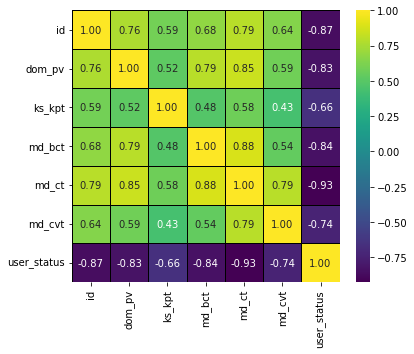

In [7]:
f,ax = plt.subplots(figsize=(6, 5))
#Heatmap for labels
sns.heatmap(dataset.corr(method='pearson'), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap='viridis',ax=ax)
plt.show()

In [8]:
#preparing data
# Removing User ID column and its data
dataset.drop('id',axis = 1, inplace = True)

<AxesSubplot:xlabel='md_bct', ylabel='user_status'>

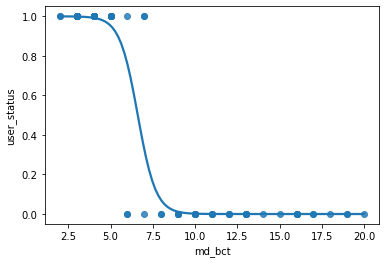

In [9]:
# set inputs and outputs
#Dataset without correct dependent variable values
X = dataset.drop('user_status',axis = 1)     
#Dependent variable values
y = dataset['user_status']

sns.regplot(x=dataset["md_bct"], y=y, data=dataset, logistic=True, ci=None)

Text(0.5, 1.0, 'Distribution of keys pressed')

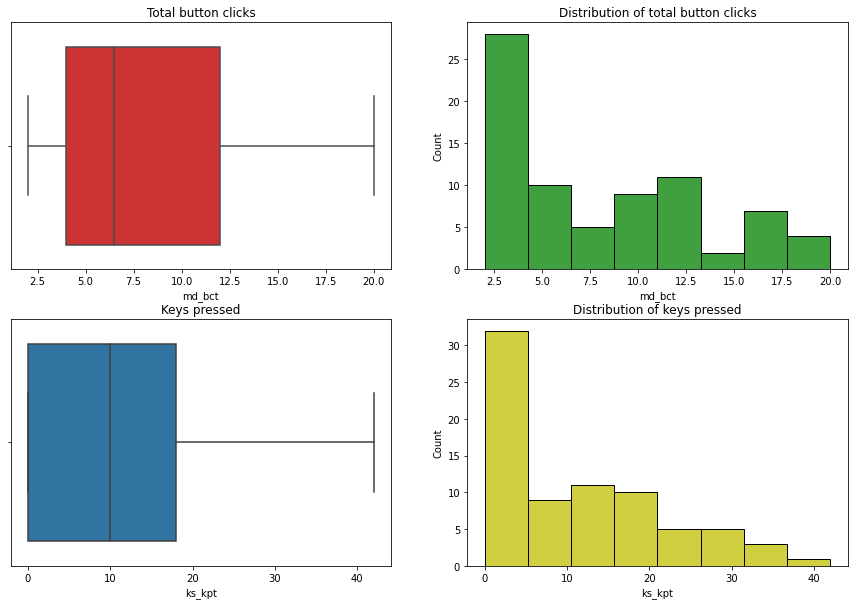

In [10]:
# Creating 4 plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# md_ct Boxplot
sns.boxplot(ax=axes[0,0],x= dataset['md_bct'], palette = "Set1")
axes[0,0].set_title('Total button clicks')
# md_ct Histogram
sns.histplot(ax=axes[0,1],x='md_bct',data=dataset,color="g")
axes[0,1].set_title('Distribution of total button clicks')

# ks_kpt Boxplot
sns.boxplot(ax=axes[1,0],x = dataset['ks_kpt'])
axes[1,0].set_title('Keys pressed')
# ks_kpt Histogram
sns.histplot(ax=axes[1,1],x='ks_kpt',data=dataset,color="y")
axes[1,1].set_title('Distribution of keys pressed')

In [11]:
# we have to scale the data for better result

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(data_scaled)
data_scaled1.head()

,0,1,2,3,4
0,1.194635,-0.279546,1.732268,1.435569,1.279374
1,1.194635,-1.031600,2.126437,1.196831,0.572229
2,-0.327023,-1.031600,-1.026913,-0.792652,-0.134916
3,-0.834242,-1.031600,-1.026913,-1.031390,-1.195633
4,0.687416,1.976615,-0.041491,1.117252,3.400809


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_scaled,y,test_size=0.30,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

# LR model
model = LogisticRegression(C=0.1,max_iter = 500)
# LR model training
model.fit(X_train,y_train)

# LR testing/prediction
y_pred = model.predict(X_test)

In [14]:
# y = B + W*x1...

print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

Weight Coefficient : [[-0.45882883 -0.43075544 -0.50384644 -0.57191246 -0.48917144]]
Bias : [-0.11591679]


In [15]:
# Accuracy: The amount of correct classifications / the total amount of classifications.
# The train accuracy: The accuracy of a model on examples it was constructed on.
# The test accuracy is the accuracy of a model on examples it hasn't seen.
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.9565217391304348
Train accuracy: 1.0


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.92      1.00      0.96        12

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.96        23
weighted avg       0.96      0.96      0.96        23



In [17]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,10,1
Actual Negative,0,12


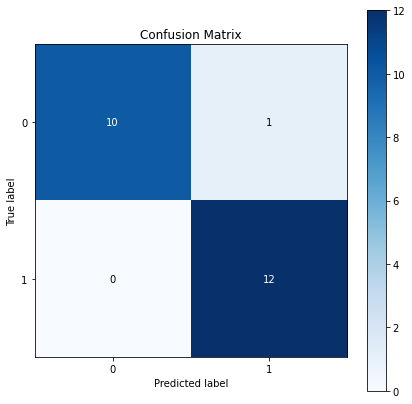

In [18]:
# We can visualize the confusion matrix
import scikitplot.metrics as splt

splt.plot_confusion_matrix(y_test,y_pred,figsize=(7,7))
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.9565217391304348
Precision: 0.9230769230769231
Recall: 1.0
F1 Score: 0.9600000000000001


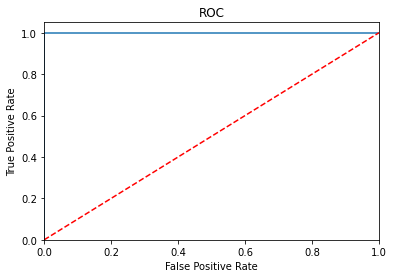

In [20]:
# Area Under Curve - AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

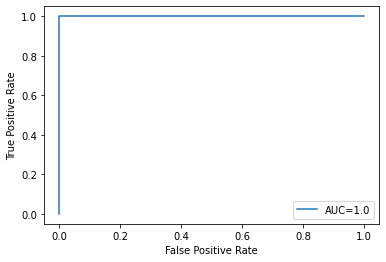

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)

In [23]:
print(f'Test accuracy {model_res.score(X_test,y_test)}')

Test accuracy 0.9565217391304348


In [24]:
print(f'Original: {X_train.shape}')
print(f'With SMOTE: {X_train_res.shape}')

Original: (53, 5)
With SMOTE: (54, 5)
